In [30]:
 
import pandas as pd
import numpy as np
import sys
import os
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Import the function
sys.path.append(os.path.abspath('../src/data'))
from extract_for_model_new import extract_time_series
from extract_for_model_new import scale_time_series_all
from extract_for_model_choosen_shift import extract_time_series_choosen_shift
%matplotlib inline

## Get the file and the features in order to extract the data
    This will give a dataframe with all the data scaled using StandardScaler
    We can change to any scaler 

In [34]:
input_path = '/home/reference/data_interim/software_private_annual_revised_income_statements_INTERIM.csv'
#features   = [ 'IQ_TOTAL_OTHER_OPER','IQ_NI','IQ_GP',
#              'IQ_OPER_INC','IQ_EBITDA','IQ_EARNING_CO','IQ_OTHER_OPER',
#              'IQ_INC_TAX','IQ_NET_INTEREST_EXP','IQ_TOTAL_REV']
features = [ 'IQ_EBIT',
              'IQ_TOTAL_OTHER_OPER',
              'IQ_OPER_INC','IQ_TOTAL_REV']
features_to_shift = ['IQ_TOTAL_REV']
ids        = []
#year_min   = 2014
steps      = 0
unitshift = 2
train_df_ps, test_df_ps = extract_time_series_choosen_shift(input_path = input_path,
                                   features = features,
                                    features_to_shift = features_to_shift,
                                      steps = steps,
                                 unitshift = 2
                                 
                                
                                )
dataset_private_soft = pd.concat([train_df_ps,test_df_ps])


#dataset_scale = scale_time_series_all(dataset,features,'standard')

Size BEFORE dropping NA: (2799, 8)
Size AFTER dropping NA: (2505, 8)
TEST  set size: (271, 8)
TRAIN set size: (2234, 8)
TEST is 11% of all available datapoints


In [35]:
dataset_private_soft.head()

,company,year,quarter,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV+0,IQ_TOTAL_REV+1
0,IQ10127723,2010.0,Q4,0.124289,0.718861,0.124289,0.853228,1.215607
1,IQ10127723,2011.0,Q4,0.313345,0.881659,0.313345,1.215607,2.796777
2,IQ10127723,2015.0,Q4,0.640532,2.020247,0.640532,2.796777,3.040088
3,IQ10127723,2016.0,Q4,-0.010990,2.903132,-0.010990,3.040088,5.158841
6,IQ102267046,2013.0,Q4,0.088781,1.544846,0.088781,2.962316,4.305274


In [36]:
input_path_bal = '/home/reference/data_interim/software_private_annual_balance_sheets_INTERIM.csv'
#features   = [ 'IQ_TOTAL_OTHER_OPER','IQ_NI','IQ_GP',
#              'IQ_OPER_INC','IQ_EBITDA','IQ_EARNING_CO','IQ_OTHER_OPER',
#              'IQ_INC_TAX','IQ_NET_INTEREST_EXP','IQ_TOTAL_REV']
features_bal = [ 'IQ_AR','IQ_RE','IQ_TOTAL_CA','IQ_TOTAL_ASSETS']
ids        = []
#year_min   = 2014
steps      = 0
unitshift = 0
train_bal_ps_df, test_bal_ps_df = extract_time_series_choosen_shift(input_path = input_path_bal,
                                   features = features_bal,
                                    
                                      steps = steps,
                                 unitshift = 0
                                 
                                
                                )
dataset_bal_ps = pd.concat([train_bal_ps_df,test_bal_ps_df])


#dataset_scale_bal = scale_time_series_all(dataset_bal,features_bal,'standard')

Size BEFORE dropping NA: (2773, 7)
Size AFTER dropping NA: (1485, 7)
TEST  set size: (163, 7)
TRAIN set size: (1322, 7)
TEST is 11% of all available datapoints


In [37]:
dataset_bal_ps.head()

,company,year,quarter,IQ_AR,IQ_RE,IQ_TOTAL_CA,IQ_TOTAL_ASSETS
6,IQ102267046,2013.0,Q4,2.968735,-0.265636,4.019000,4.185186
7,IQ102267046,2014.0,Q4,4.727453,0.104379,6.089649,6.319974
8,IQ102267046,2015.0,Q4,7.006268,0.146643,9.024148,9.469516
9,IQ102267046,2016.0,Q4,11.502536,0.551252,14.602308,15.627177
29,IQ105654219,2007.0,Q4,0.736371,-0.161029,1.532117,1.867177


In [38]:
dataset_ps = dataset_private_soft.merge(dataset_bal_ps,on = ['company','year'])

In [39]:
dataset_ps = dataset_ps.drop(['quarter_y'],axis=1)
dataset_ps = dataset_ps.rename(columns={'quarter_x':'quarter'})

In [40]:
dataset_ps.head()

,company,year,quarter,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV+0,IQ_TOTAL_REV+1,IQ_AR,IQ_RE,IQ_TOTAL_CA,IQ_TOTAL_ASSETS
0,IQ102267046,2013.0,Q4,0.088781,1.544846,0.088781,2.962316,4.305274,2.968735,-0.265636,4.019000,4.185186
1,IQ102267046,2014.0,Q4,0.161020,2.177063,0.161020,4.305274,6.537584,4.727453,0.104379,6.089649,6.319974
2,IQ102267046,2015.0,Q4,0.018564,3.163827,0.018564,6.537584,12.468611,7.006268,0.146643,9.024148,9.469516
3,IQ105654219,2007.0,Q4,-0.058002,1.405880,-0.058002,2.912760,4.642862,0.736371,-0.161029,1.532117,1.867177
4,IQ105654219,2012.0,Q4,0.417684,1.918909,0.417684,4.642862,4.957326,1.114145,0.935905,2.518607,3.141921


In [41]:
dataset_ps.describe()

,year,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV+0,IQ_TOTAL_REV+1,IQ_AR,IQ_RE,IQ_TOTAL_CA,IQ_TOTAL_ASSETS
count,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000
mean,2011.515589,1.616531,10.975795,1.616531,32.691520,36.293450,407.293257,61.414042,664.997273,786.052984
std,4.116865,10.071779,20.709506,10.071779,95.671304,106.763131,8234.062348,1106.938604,14170.377578,15788.193754
min,1998.000000,-69.247000,-10.890000,-69.247000,0.011290,0.247780,0.000733,-459.751000,0.011000,0.011000
25%,2008.000000,-0.288500,2.736300,-0.288500,3.939944,4.538973,0.957167,-2.970064,2.629606,4.117238
50%,2012.000000,0.229527,5.172118,0.229527,7.896724,9.040180,2.204406,0.136475,5.869546,8.528949
75%,2015.000000,1.103750,10.995634,1.103750,18.051302,20.541813,5.349000,1.523947,13.758214,20.558578
max,2017.000000,113.530655,305.577760,113.530655,897.906860,1046.225200,210583.000000,29024.000000,438061.000000,483879.000000


In [42]:
input_path = '/home/reference/data_interim/health_private_annual_income_statements_INTERIM.csv'
#features   = [ 'IQ_TOTAL_OTHER_OPER','IQ_NI','IQ_GP',
#              'IQ_OPER_INC','IQ_EBITDA','IQ_EARNING_CO','IQ_OTHER_OPER',
#              'IQ_INC_TAX','IQ_NET_INTEREST_EXP','IQ_TOTAL_REV']
features = [ 'IQ_EBIT',
              'IQ_TOTAL_OTHER_OPER',
              'IQ_OPER_INC','IQ_TOTAL_REV']
features_to_shift = ['IQ_TOTAL_REV']
ids        = []
#year_min   = 2014
steps      = 0
unitshift = 2
train_df_prh, test_df_prh = extract_time_series_choosen_shift(input_path = input_path,
                                   features = features,
                                    features_to_shift = features_to_shift,
                                      steps = steps,
                                 unitshift = 2
                                 
                                
                                )
dataset_prh = pd.concat([train_df_prh,test_df_prh])


#dataset_scale = scale_time_series_all(dataset,features,'standard')

Size BEFORE dropping NA: (2819, 8)
Size AFTER dropping NA: (2516, 8)
TEST  set size: (277, 8)
TRAIN set size: (2239, 8)
TEST is 11% of all available datapoints


In [43]:
dataset_prh.head()

,company,year,quarter,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV+0,IQ_TOTAL_REV+1
0,IQ1001166,2002.0,Q1,-7.401,8.338,-7.401,1.113,4.727
1,IQ1001166,2003.0,Q1,-47.818,52.545,-47.818,4.727,23.510
2,IQ1001166,2004.0,Q1,-65.681,89.191,-65.681,23.510,7.936
3,IQ1001166,2005.0,Q1,-79.818,87.754,-79.818,7.936,10.883
4,IQ1001166,2007.0,Q2,-72.263,83.146,-72.263,10.883,16.713


In [44]:
input_path_bal = '/home/reference/data_interim/health_private_annual_balance_sheets_INTERIM.csv'
#features   = [ 'IQ_TOTAL_OTHER_OPER','IQ_NI','IQ_GP',
#              'IQ_OPER_INC','IQ_EBITDA','IQ_EARNING_CO','IQ_OTHER_OPER',
#              'IQ_INC_TAX','IQ_NET_INTEREST_EXP','IQ_TOTAL_REV']
features_bal = [ 'IQ_AR','IQ_RE','IQ_TOTAL_CA','IQ_TOTAL_ASSETS']
ids        = []
#year_min   = 2014
steps      = 0
unitshift = 0
train_bal_prh_df, test_bal_prh_df = extract_time_series_choosen_shift(input_path = input_path_bal,
                                   features = features_bal,
                                    
                                      steps = steps,
                                 unitshift = 0
                                 
                                
                                )
dataset_bal_prh = pd.concat([train_bal_prh_df,test_bal_prh_df])


#dataset_scale_bal = scale_time_series_all(dataset_bal,features_bal,'standard')

Size BEFORE dropping NA: (2817, 7)
Size AFTER dropping NA: (1820, 7)
TEST  set size: (198, 7)
TRAIN set size: (1622, 7)
TEST is 11% of all available datapoints


In [45]:
dataset_prh = dataset_prh.merge(dataset_bal_prh,on = ['company','year'])

In [46]:
dataset_prh.head()

,company,year,quarter_x,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV+0,IQ_TOTAL_REV+1,quarter_y,IQ_AR,IQ_RE,IQ_TOTAL_CA,IQ_TOTAL_ASSETS
0,IQ1001166,2003.0,Q1,-47.818,52.545,-47.818,4.727,23.510,Q1,5.938,-53.335,158.101,183.711
1,IQ1001166,2005.0,Q1,-79.818,87.754,-79.818,7.936,10.883,Q1,0.421,-90.146,158.378,184.544
2,IQ1001166,2007.0,Q2,-72.263,83.146,-72.263,10.883,16.713,Q2,0.205,-274.993,89.842,109.581
3,IQ1001166,2008.0,Q3,-94.226,110.939,-94.226,16.713,31.166,Q3,2.920,-428.884,57.791,69.097
4,IQ1001166,2013.0,Q2,-2.311,33.477,-2.311,31.166,49.167,Q2,6.197,-609.110,20.429,21.216


In [47]:
dataset_prh = dataset_prh.drop(['quarter_y'],axis=1)
dataset_prh = dataset_prh.rename(columns = {'quarter_x':'quarter'})

In [48]:
dataset_prh.head()

,company,year,quarter,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV+0,IQ_TOTAL_REV+1,IQ_AR,IQ_RE,IQ_TOTAL_CA,IQ_TOTAL_ASSETS
0,IQ1001166,2003.0,Q1,-47.818,52.545,-47.818,4.727,23.510,5.938,-53.335,158.101,183.711
1,IQ1001166,2005.0,Q1,-79.818,87.754,-79.818,7.936,10.883,0.421,-90.146,158.378,184.544
2,IQ1001166,2007.0,Q2,-72.263,83.146,-72.263,10.883,16.713,0.205,-274.993,89.842,109.581
3,IQ1001166,2008.0,Q3,-94.226,110.939,-94.226,16.713,31.166,2.920,-428.884,57.791,69.097
4,IQ1001166,2013.0,Q2,-2.311,33.477,-2.311,31.166,49.167,6.197,-609.110,20.429,21.216


In [49]:
dataset_p = pd.concat([dataset_ps,dataset_prh],axis=0,ignore_index=True)

In [50]:
dataset_p.head()

,company,year,quarter,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV+0,IQ_TOTAL_REV+1,IQ_AR,IQ_RE,IQ_TOTAL_CA,IQ_TOTAL_ASSETS
0,IQ102267046,2013.0,Q4,0.088781,1.544846,0.088781,2.962316,4.305274,2.968735,-0.265636,4.019000,4.185186
1,IQ102267046,2014.0,Q4,0.161020,2.177063,0.161020,4.305274,6.537584,4.727453,0.104379,6.089649,6.319974
2,IQ102267046,2015.0,Q4,0.018564,3.163827,0.018564,6.537584,12.468611,7.006268,0.146643,9.024148,9.469516
3,IQ105654219,2007.0,Q4,-0.058002,1.405880,-0.058002,2.912760,4.642862,0.736371,-0.161029,1.532117,1.867177
4,IQ105654219,2012.0,Q4,0.417684,1.918909,0.417684,4.642862,4.957326,1.114145,0.935905,2.518607,3.141921


In [51]:
dataset_p.describe()

,year,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV+0,IQ_TOTAL_REV+1,IQ_AR,IQ_RE,IQ_TOTAL_CA,IQ_TOTAL_ASSETS
count,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000
mean,2011.591823,8.829972,49.466128,8.829972,130.896237,147.170284,202.888234,29.333571,363.717214,537.472088
std,4.156819,90.226175,328.897464,90.226175,904.809997,1039.204371,5515.175220,780.945126,9501.037801,10677.141051
min,1989.000000,-549.326000,-10.890000,-549.326000,0.005610,0.013454,0.000341,-3581.000000,0.011000,0.011000
25%,2009.000000,-0.239003,3.156833,-0.239003,5.399819,6.238908,0.973162,-3.087786,3.267014,5.846747
50%,2012.000000,0.461642,6.419000,0.461642,12.051248,13.044219,2.447862,0.232546,7.367432,12.906998
75%,2015.000000,2.145033,15.796549,2.145033,29.093663,31.370793,6.493000,2.677254,20.306000,47.606655
max,2018.000000,2231.700000,6982.900000,2231.700000,21592.895000,21592.895000,210583.000000,29024.000000,438061.000000,483879.000000


## Prepare public data

In [52]:
input_path = '/home/reference/data_interim/software_public_quarterly_revised_income_statements_INTERIM.csv'
#features   = [ 'IQ_TOTAL_OTHER_OPER','IQ_NI','IQ_GP',
#              'IQ_OPER_INC','IQ_EBITDA','IQ_EARNING_CO','IQ_OTHER_OPER',
#              'IQ_INC_TAX','IQ_NET_INTEREST_EXP','IQ_TOTAL_REV']
features = [ 'IQ_EBIT',
              'IQ_TOTAL_OTHER_OPER',
              'IQ_OPER_INC','IQ_TOTAL_REV']
features_to_shift = ['IQ_TOTAL_REV']
ids        = []
#year_min   = 2014
steps      = 0
unitshift = 2
train_df_pus, test_df_pus = extract_time_series_choosen_shift(input_path = input_path,
                                   features = features,
                                    features_to_shift = features_to_shift,
                                      steps = steps,
                                 unitshift = 2
                                 
                                
                                )
dataset_public_soft = pd.concat([train_df_pus,test_df_pus])


#dataset_scale = scale_time_series_all(dataset,features,'standard')

Size BEFORE dropping NA: (4508, 8)
Size AFTER dropping NA: (3796, 8)
TEST  set size: (560, 8)
TRAIN set size: (3236, 8)
TEST is 15% of all available datapoints


In [53]:
dataset_public_soft.quarter.unique()

array(['Q4', 'Q3', 'Q2', 'Q1'], dtype=object)

In [54]:
input_path = '/home/reference/data_interim/health_public_quarterly_revised_income_statements_INTERIM.csv'
#features   = [ 'IQ_TOTAL_OTHER_OPER','IQ_NI','IQ_GP',
#              'IQ_OPER_INC','IQ_EBITDA','IQ_EARNING_CO','IQ_OTHER_OPER',
#              'IQ_INC_TAX','IQ_NET_INTEREST_EXP','IQ_TOTAL_REV']
features = [ 'IQ_EBIT',
              'IQ_TOTAL_OTHER_OPER',
              'IQ_OPER_INC','IQ_TOTAL_REV']
features_to_shift = ['IQ_TOTAL_REV']
ids        = []
#year_min   = 2014
steps      = 0
unitshift = 2
train_df_puh, test_df_puh = extract_time_series_choosen_shift(input_path = input_path,
                                   features = features,
                                    features_to_shift = features_to_shift,
                                      steps = steps,
                                 unitshift = 2
                                 
                                
                                )
dataset_public_health = pd.concat([train_df_puh,test_df_puh])


#dataset_scale = scale_time_series_all(dataset,features,'standard')

Size BEFORE dropping NA: (3913, 8)
Size AFTER dropping NA: (3393, 8)
TEST  set size: (449, 8)
TRAIN set size: (2944, 8)
TEST is 13% of all available datapoints


In [55]:
dataset_public_health['quarter'].unique()

array(['Q4', 'Q2', 'Q3', 'Q1'], dtype=object)

In [56]:
input_path_bal = '/home/reference/data_interim/software_public_quarterly_balance_sheets_3_INTERIM.csv'
#features   = [ 'IQ_TOTAL_OTHER_OPER','IQ_NI','IQ_GP',
#              'IQ_OPER_INC','IQ_EBITDA','IQ_EARNING_CO','IQ_OTHER_OPER',
#              'IQ_INC_TAX','IQ_NET_INTEREST_EXP','IQ_TOTAL_REV']
features_bal = [ 'IQ_AR','IQ_RE','IQ_TOTAL_CA','IQ_TOTAL_ASSETS']
ids        = []
#year_min   = 2014
steps      = 0
unitshift = 0
train_bal_pus3_df, test_bal_pus3_df = extract_time_series_choosen_shift(input_path = input_path_bal,
                                   features = features_bal,
                                    
                                      steps = steps,
                                 unitshift = 0
                                 
                                
                                )
dataset_bal_pus3 = pd.concat([train_bal_pus3_df,test_bal_pus3_df])


#dataset_scale_bal = scale_time_series_all(dataset_bal,features_bal,'standard')

Size BEFORE dropping NA: (575, 7)
Size AFTER dropping NA: (475, 7)
TEST  set size: (66, 7)
TRAIN set size: (409, 7)
TEST is 14% of all available datapoints


In [57]:
input_path_bal = '/home/reference/data_interim/software_public_quarterly_balance_sheets_2_INTERIM.csv'
#features   = [ 'IQ_TOTAL_OTHER_OPER','IQ_NI','IQ_GP',
#              'IQ_OPER_INC','IQ_EBITDA','IQ_EARNING_CO','IQ_OTHER_OPER',
#              'IQ_INC_TAX','IQ_NET_INTEREST_EXP','IQ_TOTAL_REV']
features_bal = [ 'IQ_AR','IQ_RE','IQ_TOTAL_CA','IQ_TOTAL_ASSETS']
ids        = []
#year_min   = 2014
steps      = 0
unitshift = 0
train_bal_pus2_df, test_bal_pus2_df = extract_time_series_choosen_shift(input_path = input_path_bal,
                                   features = features_bal,
                                    
                                      steps = steps,
                                 unitshift = 0
                                 
                                
                                )
dataset_bal_pus2 = pd.concat([train_bal_pus2_df,test_bal_pus2_df])


#dataset_scale_bal = scale_time_series_all(dataset_bal,features_bal,'standard')

Size BEFORE dropping NA: (1846, 7)
Size AFTER dropping NA: (1487, 7)
TEST  set size: (252, 7)
TRAIN set size: (1235, 7)
TEST is 17% of all available datapoints


In [58]:
input_path_bal = '/home/reference/data_interim/software_public_quarterly_balance_sheets_1_INTERIM.csv'
#features   = [ 'IQ_TOTAL_OTHER_OPER','IQ_NI','IQ_GP',
#              'IQ_OPER_INC','IQ_EBITDA','IQ_EARNING_CO','IQ_OTHER_OPER',
#              'IQ_INC_TAX','IQ_NET_INTEREST_EXP','IQ_TOTAL_REV']
features_bal = [ 'IQ_AR','IQ_RE','IQ_TOTAL_CA','IQ_TOTAL_ASSETS']
ids        = []
#year_min   = 2014
steps      = 0
unitshift = 0
train_bal_pus1_df, test_bal_pus1_df = extract_time_series_choosen_shift(input_path = input_path_bal,
                                   features = features_bal,
                                    
                                      steps = steps,
                                 unitshift = 0
                                 
                                
                                )
dataset_bal_pus1 = pd.concat([train_bal_pus1_df,test_bal_pus1_df])


#dataset_scale_bal = scale_time_series_all(dataset_bal,features_bal,'standard')

Size BEFORE dropping NA: (1715, 7)
Size AFTER dropping NA: (1434, 7)
TEST  set size: (223, 7)
TRAIN set size: (1211, 7)
TEST is 16% of all available datapoints


In [59]:
dataset_bal_pus = pd.concat([dataset_bal_pus1,dataset_bal_pus2,dataset_bal_pus3],axis = 0)

In [60]:
dataset_bal_pus.head()

,company,year,quarter,IQ_AR,IQ_RE,IQ_TOTAL_CA,IQ_TOTAL_ASSETS
1,IQ10360537,2006.0,Q3,0.689818,-4.591006,2.883165,5.579640
2,IQ10360537,2007.0,Q3,1.413199,-3.740313,4.950514,6.783454
9,IQ1047789,2014.0,Q2,2.523000,-50.473000,4.649000,11.065000
10,IQ1047789,2015.0,Q4,4.192000,-50.715000,5.909000,15.994000
11,IQ1047789,2016.0,Q2,3.722000,-54.003000,5.459000,16.506000


In [61]:
dataset_pus = dataset_public_soft.merge(dataset_bal_pus, on = ['company','year','quarter'])

In [62]:
dataset_pus.describe()

,year,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV+0,IQ_TOTAL_REV+1,IQ_AR,IQ_RE,IQ_TOTAL_CA,IQ_TOTAL_ASSETS
count,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000
mean,2013.081061,16.110750,24.876036,16.110750,91.888581,101.471549,134.254555,168.953322,294.249328,639.717748
std,3.571962,117.041090,168.009027,117.041090,526.896077,585.923236,564.265612,1305.228319,1472.042225,3123.247720
min,1997.000000,-20.055609,-301.157650,-20.055609,-11.126720,-11.126720,0.000934,-1032.136000,0.036154,0.111116
25%,2011.000000,-0.010141,0.509860,-0.010141,1.728972,1.912416,2.849891,-2.641000,7.728460,14.044044
50%,2014.000000,0.503000,2.044426,0.503000,7.268743,7.502257,10.075493,1.799000,23.456000,40.905000
75%,2016.000000,2.482165,6.672804,2.482165,26.690960,28.864590,39.600000,17.073000,83.669000,157.897000
max,2017.000000,1468.934100,2856.169200,1468.934100,7317.752400,8309.657000,6222.399000,20785.000000,22811.000000,41601.000000


In [63]:
input_path_bal = '/home/reference/data_interim/health_public_quarterly_balance_sheets_1_INTERIM.csv'
#features   = [ 'IQ_TOTAL_OTHER_OPER','IQ_NI','IQ_GP',
#              'IQ_OPER_INC','IQ_EBITDA','IQ_EARNING_CO','IQ_OTHER_OPER',
#              'IQ_INC_TAX','IQ_NET_INTEREST_EXP','IQ_TOTAL_REV']
features_bal = [ 'IQ_AR','IQ_RE','IQ_TOTAL_CA','IQ_TOTAL_ASSETS']
ids        = []
#year_min   = 2014
steps      = 0
unitshift = 0
train_bal_puh1_df, test_bal_puh1_df = extract_time_series_choosen_shift(input_path = input_path_bal,
                                   features = features_bal,
                                    
                                      steps = steps,
                                 unitshift = 0
                                 
                                
                                )
dataset_bal_puh1 = pd.concat([train_bal_puh1_df,test_bal_puh1_df])


#dataset_scale_bal = scale_time_series_all(dataset_bal,features_bal,'standard')

Size BEFORE dropping NA: (2460, 7)
Size AFTER dropping NA: (1961, 7)
TEST  set size: (282, 7)
TRAIN set size: (1679, 7)
TEST is 14% of all available datapoints


In [64]:
dataset_puh = dataset_public_health.merge(dataset_bal_puh1, on = ['company','year','quarter'])

In [65]:
dataset_puh.quarter.describe()

count     825
unique      2
top        Q4
freq      812
Name: quarter, dtype: object

In [66]:
dataset_pu = pd.concat([dataset_pus, dataset_puh], axis= 0)

In [67]:
dataset_pu.describe()

,year,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV+0,IQ_TOTAL_REV+1,IQ_AR,IQ_RE,IQ_TOTAL_CA,IQ_TOTAL_ASSETS
count,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000
mean,2013.284143,25.553672,58.664295,25.553672,158.300292,171.015593,595.452767,2152.580398,1685.742084,4003.847102
std,3.231822,135.685401,286.346631,135.685401,659.411599,707.511743,6006.913777,28809.392937,17975.480049,40132.576670
min,1997.000000,-357.012730,-301.157650,-357.012730,-11.126720,-11.126720,0.000934,-2517.100000,0.036154,0.111116
25%,2011.000000,-0.122077,0.741035,-0.122077,1.900054,2.126064,2.853668,-6.085380,9.594750,18.891197
50%,2014.000000,0.478245,2.674170,0.478245,7.931125,8.428801,12.259761,2.006500,32.099500,65.514848
75%,2016.000000,3.468996,12.713098,3.468996,39.807195,43.951984,66.390250,32.490000,147.210000,292.169750
max,2017.000000,2642.496600,3443.262000,2642.496600,7317.752400,8309.657000,111684.000000,579898.000000,332579.000000,774351.000000


In [68]:
#Mark rows for private companies with 0 and public companies with one
dataset_p.insert(12,'IQ_CATEGORY',np.zeros(dataset_p.shape[0]),True)
dataset_pu.insert(12,'IQ_CATEGORY',np.ones(dataset_pu.shape[0]),True)

In [69]:
dataset_pu.head()

,company,year,quarter,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV+0,IQ_TOTAL_REV+1,IQ_AR,IQ_RE,IQ_TOTAL_CA,IQ_TOTAL_ASSETS,IQ_CATEGORY
0,IQ1004737,2010.0,Q4,3.458828,2.173012,3.458828,23.524069,30.077684,58.182410,12.120945,74.876205,154.95436,1.0
1,IQ1004737,2013.0,Q4,2.937156,4.861440,2.937156,30.630005,33.484314,87.584770,10.780226,109.317440,198.45361,1.0
2,IQ1004737,2014.0,Q4,3.888034,3.575317,3.888034,33.484314,27.906860,67.501175,10.576863,88.235640,179.30421,1.0
3,IQ1004737,2015.0,Q4,3.053093,3.604232,3.053093,27.906860,33.299282,73.334110,12.795616,99.384030,190.43138,1.0
4,IQ1004737,2016.0,Q4,3.291391,3.488404,3.291391,33.299282,40.990250,72.831040,16.234600,100.336740,190.97478,1.0


In [70]:

dataset = pd.concat([dataset_p,dataset_pu], axis = 0)

In [71]:
dataset.describe()

,year,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV+0,IQ_TOTAL_REV+1,IQ_AR,IQ_RE,IQ_TOTAL_CA,IQ_TOTAL_ASSETS,IQ_CATEGORY
count,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000
mean,2012.313465,15.961321,53.388426,15.961321,142.581922,157.338442,370.286282,934.732160,927.457348,2015.609723,0.426422
std,3.881080,112.185966,311.468574,112.185966,809.359432,912.623422,5732.741112,18848.913705,13782.055190,27476.226624,0.494605
min,1989.000000,-549.326000,-301.157650,-549.326000,-11.126720,-11.126720,0.000341,-3581.000000,0.011000,0.011000,0.000000
25%,2010.000000,-0.170280,1.870617,-0.170280,3.982001,4.547000,1.318000,-3.981476,4.519646,8.014220,0.000000
50%,2013.000000,0.470585,4.933438,0.470585,10.684624,11.652724,3.969332,0.481442,12.301860,24.593000,0.000000
75%,2015.000000,2.582182,14.930857,2.582182,32.010450,34.844080,20.179000,7.452000,54.126617,122.695000,1.000000
max,2018.000000,2642.496600,6982.900000,2642.496600,21592.895000,21592.895000,210583.000000,579898.000000,438061.000000,774351.000000,1.000000


In [72]:
dataset['IQ_CATEGORY'] = pd.Categorical(dataset.IQ_CATEGORY)

In [73]:
dataset = dataset.rename(columns={'IQ_TOTAL_REV+0':'IQ_TOTAL_REV','IQ_TOTAL_REV+1':'TARGET'})

In [74]:
dataset.head()

,company,year,quarter,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,TARGET,IQ_AR,IQ_RE,IQ_TOTAL_CA,IQ_TOTAL_ASSETS,IQ_CATEGORY
0,IQ102267046,2013.0,Q4,0.088781,1.544846,0.088781,2.962316,4.305274,2.968735,-0.265636,4.019000,4.185186,0.0
1,IQ102267046,2014.0,Q4,0.161020,2.177063,0.161020,4.305274,6.537584,4.727453,0.104379,6.089649,6.319974,0.0
2,IQ102267046,2015.0,Q4,0.018564,3.163827,0.018564,6.537584,12.468611,7.006268,0.146643,9.024148,9.469516,0.0
3,IQ105654219,2007.0,Q4,-0.058002,1.405880,-0.058002,2.912760,4.642862,0.736371,-0.161029,1.532117,1.867177,0.0
4,IQ105654219,2012.0,Q4,0.417684,1.918909,0.417684,4.642862,4.957326,1.114145,0.935905,2.518607,3.141921,0.0


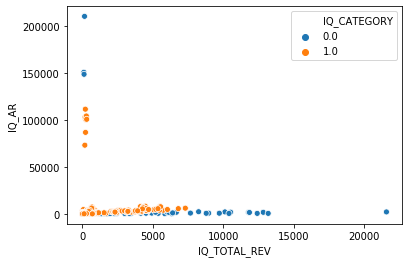

In [75]:
sns.scatterplot(x = dataset['IQ_TOTAL_REV'],y = dataset['IQ_AR'],hue = 'IQ_CATEGORY', data = dataset)

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics
X = pd.get_dummies(dataset[["IQ_CATEGORY"]],sparse = False)

dataset.insert(12,"IQ_PRIV",X['IQ_CATEGORY_0.0'],True)
dataset.insert(13,"IQ_PUB",X['IQ_CATEGORY_1.0'],True)
#dataset.rename(columns={"0.0":"IQ_PRIVATE","1.0":"IQ_PUBLIC"})

In [77]:
dataset.head()

,company,year,quarter,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,TARGET,IQ_AR,IQ_RE,IQ_TOTAL_CA,IQ_TOTAL_ASSETS,IQ_PRIV,IQ_PUB,IQ_CATEGORY
0,IQ102267046,2013.0,Q4,0.088781,1.544846,0.088781,2.962316,4.305274,2.968735,-0.265636,4.019000,4.185186,1,0,0.0
1,IQ102267046,2014.0,Q4,0.161020,2.177063,0.161020,4.305274,6.537584,4.727453,0.104379,6.089649,6.319974,1,0,0.0
2,IQ102267046,2015.0,Q4,0.018564,3.163827,0.018564,6.537584,12.468611,7.006268,0.146643,9.024148,9.469516,1,0,0.0
3,IQ105654219,2007.0,Q4,-0.058002,1.405880,-0.058002,2.912760,4.642862,0.736371,-0.161029,1.532117,1.867177,1,0,0.0
4,IQ105654219,2012.0,Q4,0.417684,1.918909,0.417684,4.642862,4.957326,1.114145,0.935905,2.518607,3.141921,1,0,0.0


In [78]:
dataset = dataset.drop(['IQ_CATEGORY'], axis = 1)

In [79]:
dataset.head()

,company,year,quarter,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,TARGET,IQ_AR,IQ_RE,IQ_TOTAL_CA,IQ_TOTAL_ASSETS,IQ_PRIV,IQ_PUB
0,IQ102267046,2013.0,Q4,0.088781,1.544846,0.088781,2.962316,4.305274,2.968735,-0.265636,4.019000,4.185186,1,0
1,IQ102267046,2014.0,Q4,0.161020,2.177063,0.161020,4.305274,6.537584,4.727453,0.104379,6.089649,6.319974,1,0
2,IQ102267046,2015.0,Q4,0.018564,3.163827,0.018564,6.537584,12.468611,7.006268,0.146643,9.024148,9.469516,1,0
3,IQ105654219,2007.0,Q4,-0.058002,1.405880,-0.058002,2.912760,4.642862,0.736371,-0.161029,1.532117,1.867177,1,0
4,IQ105654219,2012.0,Q4,0.417684,1.918909,0.417684,4.642862,4.957326,1.114145,0.935905,2.518607,3.141921,1,0


In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scaler.fit_transform()

y = dataset.loc[:,"TARGET"]
X  = dataset.loc[:,"IQ_EBIT":"IQ_PUB"].drop("TARGET",axis = 1)

X_train,X_test = train_test_split(dataset,random_state=0)
#plt.rcParams["figure.figsize"]=40,40

In [81]:
X_train.head()

,company,year,quarter,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,TARGET,IQ_AR,IQ_RE,IQ_TOTAL_CA,IQ_TOTAL_ASSETS,IQ_PRIV,IQ_PUB
1321,IQ8101593,2017.0,Q4,0.545471,2.682045,0.545471,18.533562,14.974426,12.219000,-18.096000,27.892000,51.811000,0,1
982,IQ730755,2005.0,Q4,0.268086,0.234310,0.268086,0.882826,1.032551,0.277988,-16.449991,4.171007,4.174006,1,0
759,IQ65340486,2016.0,Q4,1.293746,3.055530,1.293746,12.611018,30.453530,84.437000,2.950000,149.843000,206.577000,0,1
264,IQ20407491,2014.0,Q4,0.009858,0.166048,0.009858,0.701261,0.766009,1.604414,-7.118092,2.117917,7.320872,0,1
1698,IQ20554996,2005.0,Q4,0.715991,0.059990,0.715991,0.871990,3.296000,0.144001,0.291994,8.973993,33.547010,1,0


In [82]:
X_train.columns

Index(['company', 'year', 'quarter', 'IQ_EBIT', 'IQ_TOTAL_OTHER_OPER',
       'IQ_OPER_INC', 'IQ_TOTAL_REV', 'TARGET', 'IQ_AR', 'IQ_RE',
       'IQ_TOTAL_CA', 'IQ_TOTAL_ASSETS', 'IQ_PRIV', 'IQ_PUB'],
      dtype='object')

In [83]:
X_train_scale = scale_time_series_all(X_train,['IQ_EBIT', 'IQ_TOTAL_OTHER_OPER',
       'IQ_OPER_INC', 'IQ_TOTAL_REV', 'TARGET', 'IQ_AR', 'IQ_RE',
       'IQ_TOTAL_CA', 'IQ_TOTAL_ASSETS'])



In [84]:
#X_train_scale.reset_index()
#X_train['IQ_PRIV'].reset_index()
X_train_scale['IQ_PRIV'] = X_train.loc[:,'IQ_PRIV'].values
X_train_scale['IQ_PUB'] = X_train.loc[:,'IQ_PUB'].values
X_train_scale.head()

,company,year,quarter,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,TARGET,IQ_AR,IQ_RE,IQ_TOTAL_CA,IQ_TOTAL_ASSETS,IQ_PRIV,IQ_PUB
0,IQ8101593,2017.0,Q4,-0.132366,-0.160586,-0.132366,-0.154314,-0.153466,-0.061632,-0.050472,-0.063947,-0.070936,0,1
1,IQ730755,2005.0,Q4,-0.134673,-0.168030,-0.134673,-0.176223,-0.168306,-0.063687,-0.050385,-0.065625,-0.072636,1,0
2,IQ65340486,2016.0,Q4,-0.126142,-0.159450,-0.126142,-0.161665,-0.136990,-0.049204,-0.049358,-0.055322,-0.065414,0,1
3,IQ20407491,2014.0,Q4,-0.136821,-0.168238,-0.136821,-0.176448,-0.168589,-0.063459,-0.049891,-0.065770,-0.072523,0,1
4,IQ20554996,2005.0,Q4,-0.130947,-0.168560,-0.130947,-0.176236,-0.165896,-0.063710,-0.049498,-0.065285,-0.071587,1,0


In [85]:
y_train = X_train_scale['TARGET']
X_test_scale = (X_test.loc[:,'IQ_EBIT':'IQ_TOTAL_ASSETS'] - np.mean(X_train.loc[:,'IQ_EBIT':'IQ_TOTAL_ASSETS'] ))/np.std(X_train.loc[:,'IQ_EBIT':'IQ_TOTAL_ASSETS'])
X_test_scale.head()
#_test = X_test_scale['TARGET']- np.mean(y_train)

,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,TARGET,IQ_AR,IQ_RE,IQ_TOTAL_CA,IQ_TOTAL_ASSETS
42,-0.135086,-0.156008,-0.135086,-0.170898,-0.161883,-0.063179,-0.049781,-0.065606,-0.072572
176,-0.133071,-0.160868,-0.133071,-0.172328,-0.164269,-0.063173,-0.050315,-0.064955,-0.071895
1852,0.007018,-0.116124,0.007018,-0.115999,-0.107026,-0.063025,-0.047934,-0.063305,-0.071056
413,-0.137020,-0.182162,-0.137020,-0.169430,-0.162355,-0.061758,-0.067201,-0.063506,-0.066015
1262,-0.114320,-0.146310,-0.114320,-0.143074,-0.140570,-0.062558,-0.050659,-0.064984,-0.072306


In [86]:
X_test_scale.insert(0,'company',X_test['company'],False)
X_test_scale.insert(1,'year',X_test['year'],False)
X_test_scale.insert(2,'quarter',X_test['quarter'],False)
X_test_scale.insert(12,'IQ_PRIV',X_test['IQ_PRIV'],False)
X_test_scale.insert(13,'IQ_PUB',X_test['IQ_PUB'],False)


In [87]:
y_test_scale = X_test_scale.loc[:,'TARGET']
y_train_scale = X_train_scale.loc[:,'TARGET']
X_test_scale.drop('TARGET',axis= 1,inplace = True)
X_train_scale.drop('TARGET',axis= 1,inplace = True)

In [88]:
X_train_scale.head()

,company,year,quarter,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,IQ_AR,IQ_RE,IQ_TOTAL_CA,IQ_TOTAL_ASSETS,IQ_PRIV,IQ_PUB
0,IQ8101593,2017.0,Q4,-0.132366,-0.160586,-0.132366,-0.154314,-0.061632,-0.050472,-0.063947,-0.070936,0,1
1,IQ730755,2005.0,Q4,-0.134673,-0.168030,-0.134673,-0.176223,-0.063687,-0.050385,-0.065625,-0.072636,1,0
2,IQ65340486,2016.0,Q4,-0.126142,-0.159450,-0.126142,-0.161665,-0.049204,-0.049358,-0.055322,-0.065414,0,1
3,IQ20407491,2014.0,Q4,-0.136821,-0.168238,-0.136821,-0.176448,-0.063459,-0.049891,-0.065770,-0.072523,0,1
4,IQ20554996,2005.0,Q4,-0.130947,-0.168560,-0.130947,-0.176236,-0.063710,-0.049498,-0.065285,-0.071587,1,0


In [89]:
X_train_scale.loc[:,'IQ_EBIT':'IQ_PUB'].values

array([[-0.13236564, -0.16058568, -0.13236564, ..., -0.07093581,
         0.        ,  1.        ],
       [-0.13467285, -0.16803016, -0.13467285, ..., -0.07263555,
         1.        ,  0.        ],
       [-0.12614172, -0.15944977, -0.12614172, ..., -0.0654136 ,
         0.        ,  1.        ],
       ...,
       [ 0.20809845,  0.06663224,  0.20809845, ..., -0.06705211,
         1.        ,  0.        ],
       [-0.14772943, -0.15776587, -0.14772943, ..., -0.07265083,
         1.        ,  0.        ],
       [-0.17172125, -0.15304566, -0.17172125, ..., -0.07235633,
         1.        ,  0.        ]])

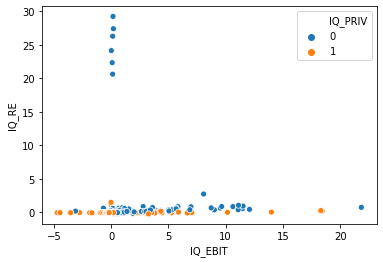

In [90]:
sns.scatterplot(x = 'IQ_EBIT', y = 'IQ_RE',hue = 'IQ_PRIV',data = X_train_scale)

In [91]:
!pip install tf-nightly-2.0_preview

In [92]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.python.data import Dataset

In [93]:
print(tf.__version__)

2.0.0


In [94]:
dataset = Dataset.from_tensor_slices((X_train_scale.loc[:,'IQ_EBIT':'IQ_PUB'].values,y_train_scale.values))

In [111]:
dataset = dataset.map(lambda window1, window2: ( window1,window2))
#for (window ,window2 )in dataset:
#    print(window.numpy(), window2.numpy())
dataset = dataset.shuffle(buffer_size = 10)
#Batching the data with size 100
dataset = dataset.batch(20).prefetch(1)
#for x,y in dataset:
#   print(x.numpy(),y.numpy())
    



[[-1.34025762e-01 -1.66931909e-01 -1.34025762e-01 -1.65648340e-01
  -6.19204992e-02 -5.05371985e-02 -6.45603731e-02 -7.17549519e-02
   0.00000000e+00  1.00000000e+00]
 [-1.39885825e-01 -1.68088960e-01 -1.39885825e-01 -1.76501794e-01
  -6.31804914e-02 -4.98190299e-02 -6.50262698e-02 -6.98129051e-02
   0.00000000e+00  1.00000000e+00]
 [-1.34672845e-01 -1.68030158e-01 -1.34672845e-01 -1.76222922e-01
  -6.36874349e-02 -5.03851471e-02 -6.56248676e-02 -7.26355523e-02
   1.00000000e+00  0.00000000e+00]
 [-8.56676351e-02 -1.47238071e-01 -8.56676351e-02 -3.65988838e-02
  -6.19439316e-02 -4.92709385e-02 -6.44629471e-02 -7.20166588e-02
   1.00000000e+00  0.00000000e+00]
 [-1.31775578e-01 -1.57167651e-01 -1.31775578e-01 -1.65540710e-01
  -6.35238912e-02 -4.97015614e-02 -6.57051475e-02 -7.23832158e-02
   1.00000000e+00  0.00000000e+00]
 [-1.38740279e-01 -1.67453240e-01 -1.38740279e-01 -1.74676821e-01
  -6.32826708e-02 -4.94883138e-02 -6.49606676e-02 -7.22621502e-02
   0.00000000e+00  1.00000000e+00

[[-1.39584333e-01 -1.67046082e-01 -1.39584333e-01 -1.77287068e-01
  -6.36034516e-02 -4.89127236e-02 -6.44913210e-02 -7.20178777e-02
   0.00000000e+00  1.00000000e+00]
 [-1.35150896e-01 -1.58818546e-01 -1.35150896e-01 -1.70715684e-01
  -6.35768569e-02 -4.95338232e-02 -6.57564505e-02 -7.26098146e-02
   1.00000000e+00  0.00000000e+00]
 [-1.32749679e-01 -1.59740377e-01 -1.32749679e-01 -1.72991335e-01
  -6.35486175e-02 -4.94915553e-02 -6.57048367e-02 -7.25333704e-02
   1.00000000e+00  0.00000000e+00]
 [-1.37100089e-01 -1.62021126e-01 -1.37100089e-01 -1.72360218e-01
  -6.35843032e-02 -4.95115426e-02 -6.57979544e-02 -7.26421961e-02
   1.00000000e+00  0.00000000e+00]
 [-1.33175819e-01 -1.65366227e-01 -1.33175819e-01 -1.70888482e-01
  -6.32374822e-02 -4.96201168e-02 -6.55017066e-02 -7.24875368e-02
   0.00000000e+00  1.00000000e+00]
 [-1.39422929e-01 -1.64430582e-01 -1.39422929e-01 -1.75546286e-01
  -6.34154161e-02 -5.16563966e-02 -6.53771230e-02 -7.24678375e-02
   0.00000000e+00  1.00000000e+00

In [163]:
#Linear regression with Tensorflow
l0 = Dense(1,input_shape=[10]) 
model = Sequential([l0])

In [164]:
#Compilation of the model
model.compile(loss="mse",optimizer = SGD(lr=1e-3,momentum = 0.9))
model.fit(dataset,epochs = 500)

Epoch 1/500
39/39 [==============================] - 0s 12ms/step - loss: 0.4403
Epoch 2/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2981
Epoch 3/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2772
Epoch 4/500
39/39 [==============================] - 0s 6ms/step - loss: 0.2689
Epoch 5/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2647
Epoch 6/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2627
Epoch 7/500
39/39 [==============================] - 0s 4ms/step - loss: 0.2618
Epoch 8/500
39/39 [==============================] - 0s 4ms/step - loss: 0.2613
Epoch 9/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2612
Epoch 10/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2608
Epoch 11/500
39/39 [==============================] - 0s 4ms/step - loss: 0.2607
Epoch 12/500
39/39 [==============================] - 0s 5ms/step - loss: 0.2608
Epoch 13/500
39/39 [================

39/39 [==============================] - 0s 4ms/step - loss: 0.2600
Epoch 102/500
39/39 [==============================] - 0s 4ms/step - loss: 0.2600
Epoch 103/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2600
Epoch 104/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2601
Epoch 105/500
39/39 [==============================] - 0s 4ms/step - loss: 0.2601
Epoch 106/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2601
Epoch 107/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2604
Epoch 108/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2600
Epoch 109/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2600
Epoch 110/500
39/39 [==============================] - 0s 4ms/step - loss: 0.2601
Epoch 111/500
39/39 [==============================] - 0s 4ms/step - loss: 0.2600
Epoch 112/500
39/39 [==============================] - 0s 4ms/step - loss: 0.2601
Epoch 113/500
39/39 [=========

39/39 [==============================] - 0s 4ms/step - loss: 0.2597
Epoch 202/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2600
Epoch 203/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2601
Epoch 204/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2597
Epoch 205/500
39/39 [==============================] - 0s 4ms/step - loss: 0.2598
Epoch 206/500
39/39 [==============================] - 0s 5ms/step - loss: 0.2597
Epoch 207/500
39/39 [==============================] - 0s 4ms/step - loss: 0.2598
Epoch 208/500
39/39 [==============================] - 0s 4ms/step - loss: 0.2598
Epoch 209/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2600
Epoch 210/500
39/39 [==============================] - 0s 4ms/step - loss: 0.2602
Epoch 211/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2600
Epoch 212/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2597
Epoch 213/500
39/39 [=========

39/39 [==============================] - 0s 4ms/step - loss: 0.2598
Epoch 302/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2597
Epoch 303/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2597
Epoch 304/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2597
Epoch 305/500
39/39 [==============================] - 0s 4ms/step - loss: 0.2596
Epoch 306/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2598
Epoch 307/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2600
Epoch 308/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2597
Epoch 309/500
39/39 [==============================] - 0s 5ms/step - loss: 0.2598
Epoch 310/500
39/39 [==============================] - 0s 4ms/step - loss: 0.2597
Epoch 311/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2597
Epoch 312/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2594
Epoch 313/500
39/39 [=========

39/39 [==============================] - 0s 3ms/step - loss: 0.2597
Epoch 402/500
39/39 [==============================] - 0s 4ms/step - loss: 0.2598
Epoch 403/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2598
Epoch 404/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2596
Epoch 405/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2597
Epoch 406/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2597
Epoch 407/500
39/39 [==============================] - 0s 5ms/step - loss: 0.2597
Epoch 408/500
39/39 [==============================] - 0s 5ms/step - loss: 0.2596
Epoch 409/500
39/39 [==============================] - 0s 4ms/step - loss: 0.2598
Epoch 410/500
39/39 [==============================] - 0s 4ms/step - loss: 0.2596
Epoch 411/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2597
Epoch 412/500
39/39 [==============================] - 0s 3ms/step - loss: 0.2596
Epoch 413/500
39/39 [=========

In [165]:
print("layer weight {}", format(l0.get_weights()))

layer weight {} [array([[-0.5163677 ],
       [ 0.08064125],
       [ 0.58700085],
       [ 0.7373601 ],
       [ 0.01977174],
       [-0.02005906],
       [-0.0621595 ],
       [ 0.05861234],
       [ 0.09156189],
       [ 0.07016525]], dtype=float32), array([-0.08256891], dtype=float32)]


In [166]:
forecast = model.predict(X_test_scale.loc[:,'IQ_EBIT':'IQ_PUB'].values).flatten()

In [167]:
print(forecast)

[-0.13956872 -0.16225964 -0.08592338 ...  0.09367395 -0.16382974
 -0.10155474]


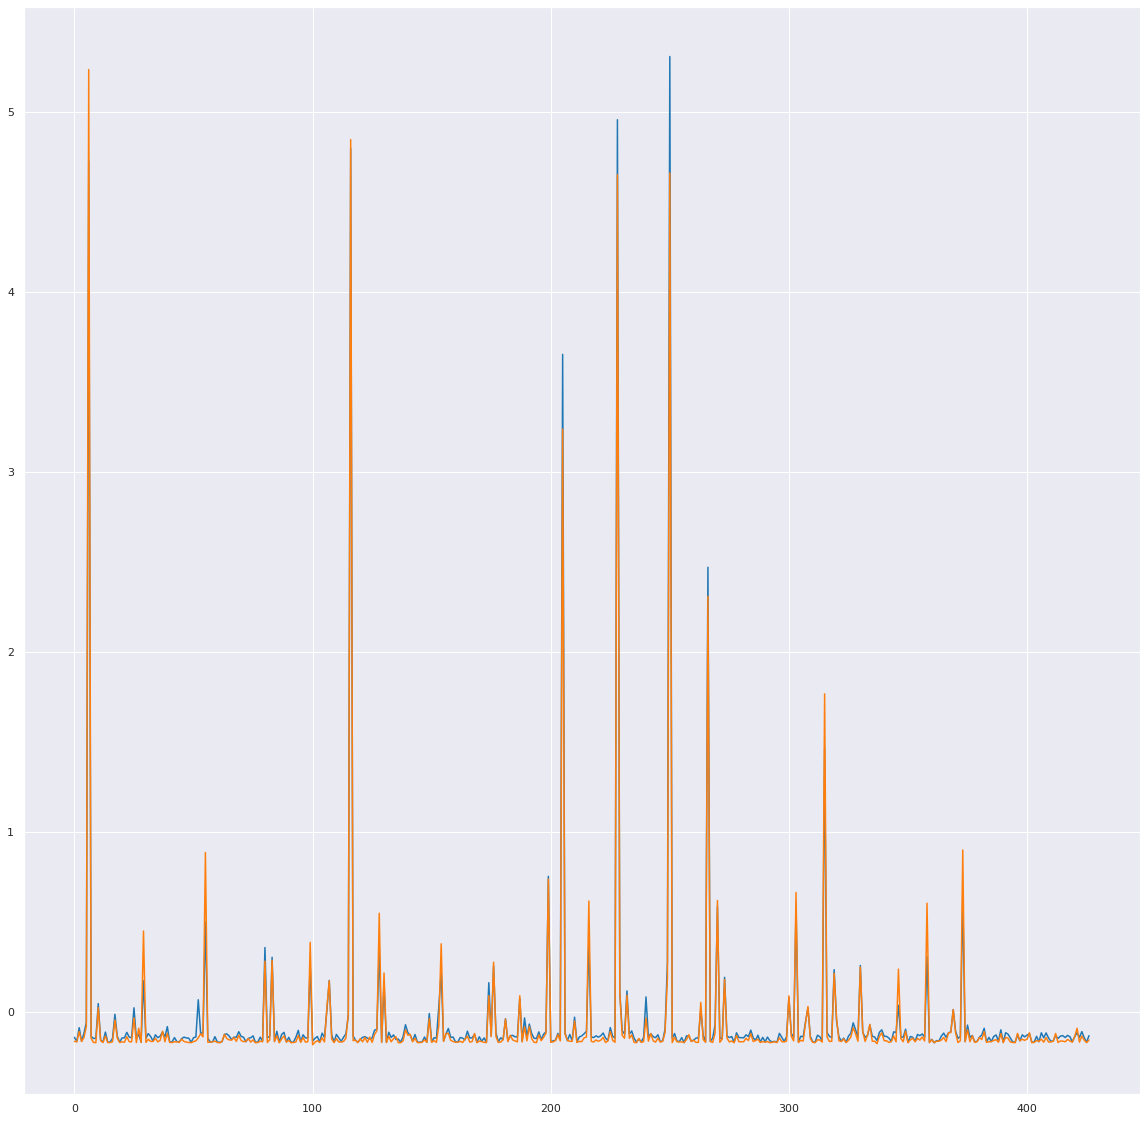

In [168]:
T = round(len(forecast)/3)
x = [i for i in range(T)]
sns.set_context("notebook")
sns.set_style("darkgrid")
plt.figure(figsize=(20,20))
sns.lineplot(x,forecast[0:T])
sns.lineplot(x,y_test_scale.values[0:T])

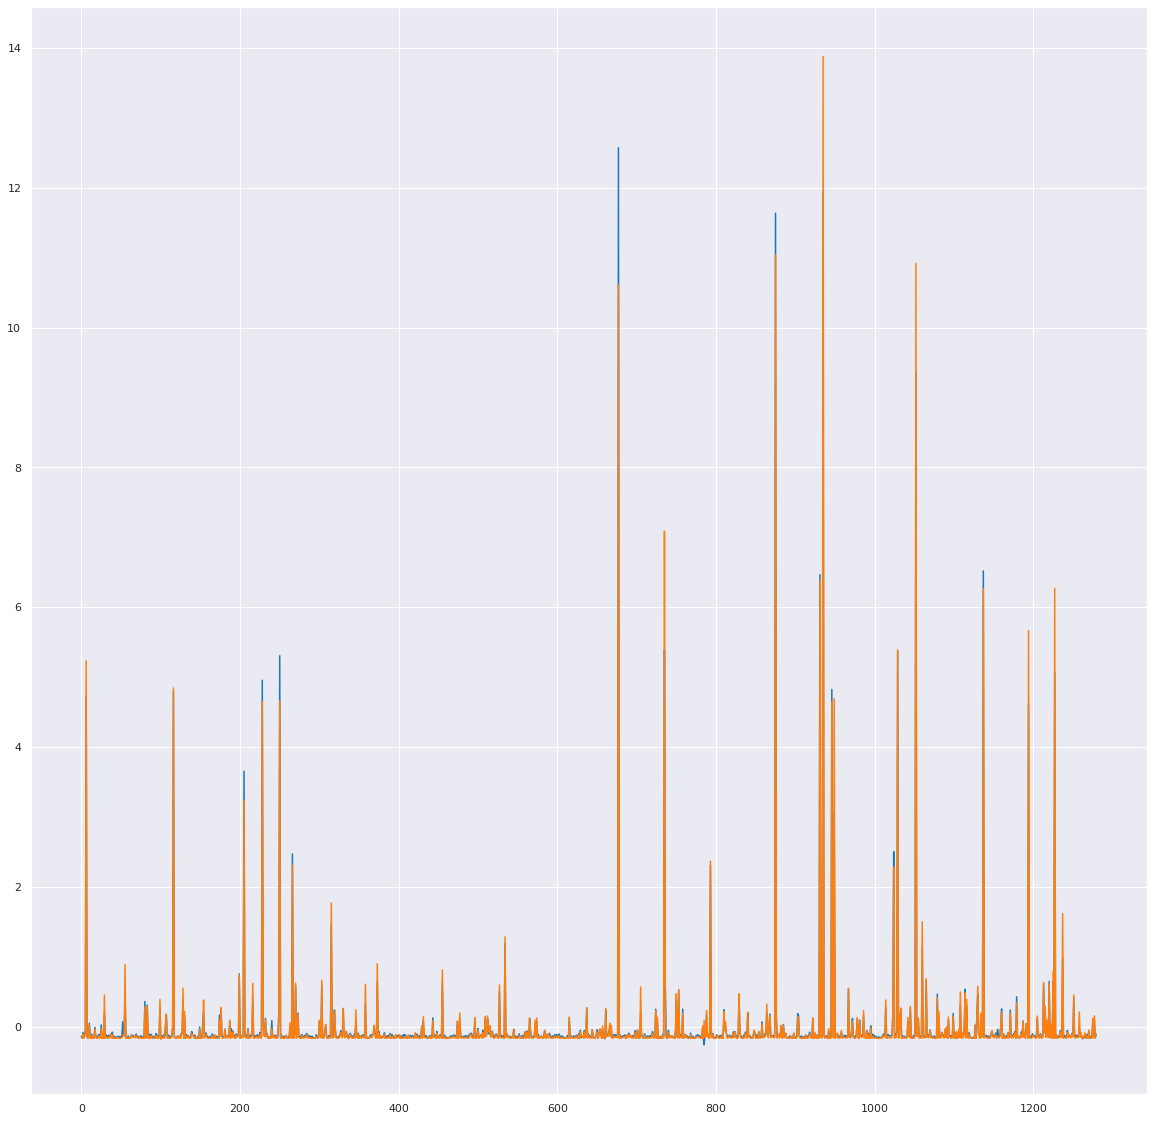

In [171]:
#T = round(len(forecast)/3)
x = [i for i in range(len(forecast))]
sns.set_context("notebook")
sns.set_style("darkgrid")
plt.figure(figsize=(20,20))
sns.lineplot(x,forecast)
sns.lineplot(x,y_test_scale.values)

In [169]:
tf.keras.metrics.mean_absolute_error(forecast,y_test_scale.values).numpy()

0.032013364203427375

In [170]:
tf.keras.metrics.mean_absolute_percentage_error(forecast,y_test_scale.values).numpy()

21.81206711177861

In [ ]:
# Let's add new layers so to have a DNN model with three layers

In [172]:
dnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_shape=[10], activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1)
    
])

In [173]:
#Compilation of the model
dnn_model.compile(loss="mse",optimizer = SGD(lr=1e-3,momentum = 0.9))
dnn_model.fit(dataset,epochs = 500)

Epoch 1/500
39/39 [==============================] - 2s 53ms/step - loss: 0.5933
Epoch 2/500
39/39 [==============================] - 2s 57ms/step - loss: 0.3411
Epoch 3/500
39/39 [==============================] - 1s 22ms/step - loss: 0.2924
Epoch 4/500
39/39 [==============================] - 2s 42ms/step - loss: 0.2780
Epoch 5/500
39/39 [==============================] - 1s 29ms/step - loss: 0.2724
Epoch 6/500
39/39 [==============================] - 1s 20ms/step - loss: 0.2683
Epoch 7/500
39/39 [==============================] - 1s 20ms/step - loss: 0.2648
Epoch 8/500
39/39 [==============================] - 1s 15ms/step - loss: 0.2631
Epoch 9/500
39/39 [==============================] - 1s 24ms/step - loss: 0.2618
Epoch 10/500
39/39 [==============================] - 1s 29ms/step - loss: 0.2609
Epoch 11/500
39/39 [==============================] - 2s 58ms/step - loss: 0.2600
Epoch 12/500
39/39 [==============================] - 2s 39ms/step - loss: 0.2586
Epoch 13/500
39/39 [=====

39/39 [==============================] - 2s 49ms/step - loss: 0.2366
Epoch 101/500
39/39 [==============================] - 2s 41ms/step - loss: 0.2376
Epoch 102/500
39/39 [==============================] - 2s 56ms/step - loss: 0.2365
Epoch 103/500
39/39 [==============================] - 2s 41ms/step - loss: 0.2370
Epoch 104/500
39/39 [==============================] - 2s 46ms/step - loss: 0.2360
Epoch 105/500
39/39 [==============================] - 1s 24ms/step - loss: 0.2365
Epoch 106/500
39/39 [==============================] - 1s 15ms/step - loss: 0.2355
Epoch 107/500
39/39 [==============================] - 2s 40ms/step - loss: 0.2357
Epoch 108/500
39/39 [==============================] - 2s 39ms/step - loss: 0.2354
Epoch 109/500
39/39 [==============================] - 1s 25ms/step - loss: 0.2363
Epoch 110/500
39/39 [==============================] - 3s 76ms/step - loss: 0.2350
Epoch 111/500
39/39 [==============================] - 1s 37ms/step - loss: 0.2347
Epoch 112/500
39/3

39/39 [==============================] - 3s 70ms/step - loss: 0.2089
Epoch 199/500
39/39 [==============================] - 1s 30ms/step - loss: 0.2084
Epoch 200/500
39/39 [==============================] - 1s 25ms/step - loss: 0.2082
Epoch 201/500
39/39 [==============================] - 1s 27ms/step - loss: 0.2063
Epoch 202/500
39/39 [==============================] - 1s 28ms/step - loss: 0.2065
Epoch 203/500
39/39 [==============================] - 1s 18ms/step - loss: 0.2077
Epoch 204/500
39/39 [==============================] - 1s 23ms/step - loss: 0.2057
Epoch 205/500
39/39 [==============================] - 1s 27ms/step - loss: 0.2046
Epoch 206/500
39/39 [==============================] - 2s 43ms/step - loss: 0.2043
Epoch 207/500
39/39 [==============================] - 2s 51ms/step - loss: 0.2055
Epoch 208/500
39/39 [==============================] - 1s 20ms/step - loss: 0.2039
Epoch 209/500
39/39 [==============================] - 1s 18ms/step - loss: 0.2038
Epoch 210/500
39/3

39/39 [==============================] - 0s 12ms/step - loss: 0.1253
Epoch 297/500
39/39 [==============================] - 2s 45ms/step - loss: 0.1197
Epoch 298/500
39/39 [==============================] - 1s 28ms/step - loss: 0.1235
Epoch 299/500
39/39 [==============================] - 2s 50ms/step - loss: 0.1217
Epoch 300/500
39/39 [==============================] - 2s 43ms/step - loss: 0.1281
Epoch 301/500
39/39 [==============================] - 1s 37ms/step - loss: 0.1164
Epoch 302/500
39/39 [==============================] - 1s 21ms/step - loss: 0.1218
Epoch 303/500
39/39 [==============================] - 1s 19ms/step - loss: 0.1095
Epoch 304/500
39/39 [==============================] - 1s 15ms/step - loss: 0.1150
Epoch 305/500
39/39 [==============================] - 2s 59ms/step - loss: 0.1072
Epoch 306/500
39/39 [==============================] - 2s 39ms/step - loss: 0.1147
Epoch 307/500
39/39 [==============================] - 1s 38ms/step - loss: 0.1079
Epoch 308/500
39/3

39/39 [==============================] - 1s 16ms/step - loss: 0.0611
Epoch 395/500
39/39 [==============================] - 2s 62ms/step - loss: 0.0642
Epoch 396/500
39/39 [==============================] - 2s 42ms/step - loss: 0.0643
Epoch 397/500
39/39 [==============================] - 1s 20ms/step - loss: 0.0639
Epoch 398/500
39/39 [==============================] - 2s 49ms/step - loss: 0.0610
Epoch 399/500
39/39 [==============================] - 1s 38ms/step - loss: 0.0618
Epoch 400/500
39/39 [==============================] - 1s 18ms/step - loss: 0.0624
Epoch 401/500
39/39 [==============================] - 1s 25ms/step - loss: 0.0587
Epoch 402/500
39/39 [==============================] - 1s 17ms/step - loss: 0.0600
Epoch 403/500
39/39 [==============================] - 1s 28ms/step - loss: 0.0589
Epoch 404/500
39/39 [==============================] - 1s 30ms/step - loss: 0.0581
Epoch 405/500
39/39 [==============================] - 2s 43ms/step - loss: 0.0585
Epoch 406/500
39/3

39/39 [==============================] - 1s 16ms/step - loss: 0.0429
Epoch 493/500
39/39 [==============================] - 2s 60ms/step - loss: 0.0415
Epoch 494/500
39/39 [==============================] - 3s 67ms/step - loss: 0.0444
Epoch 495/500
39/39 [==============================] - 3s 66ms/step - loss: 0.0412
Epoch 496/500
39/39 [==============================] - 1s 22ms/step - loss: 0.0422
Epoch 497/500
39/39 [==============================] - 0s 12ms/step - loss: 0.0417
Epoch 498/500
39/39 [==============================] - 1s 17ms/step - loss: 0.0411
Epoch 499/500
39/39 [==============================] - 2s 63ms/step - loss: 0.0419
Epoch 500/500
39/39 [==============================] - 1s 29ms/step - loss: 0.0420


In [175]:
#print("layer weight {}", format(dnn_model.get_weights()))

In [176]:
forecast = dnn_model.predict(X_test_scale.loc[:,'IQ_EBIT':'IQ_PUB'].values).flatten()

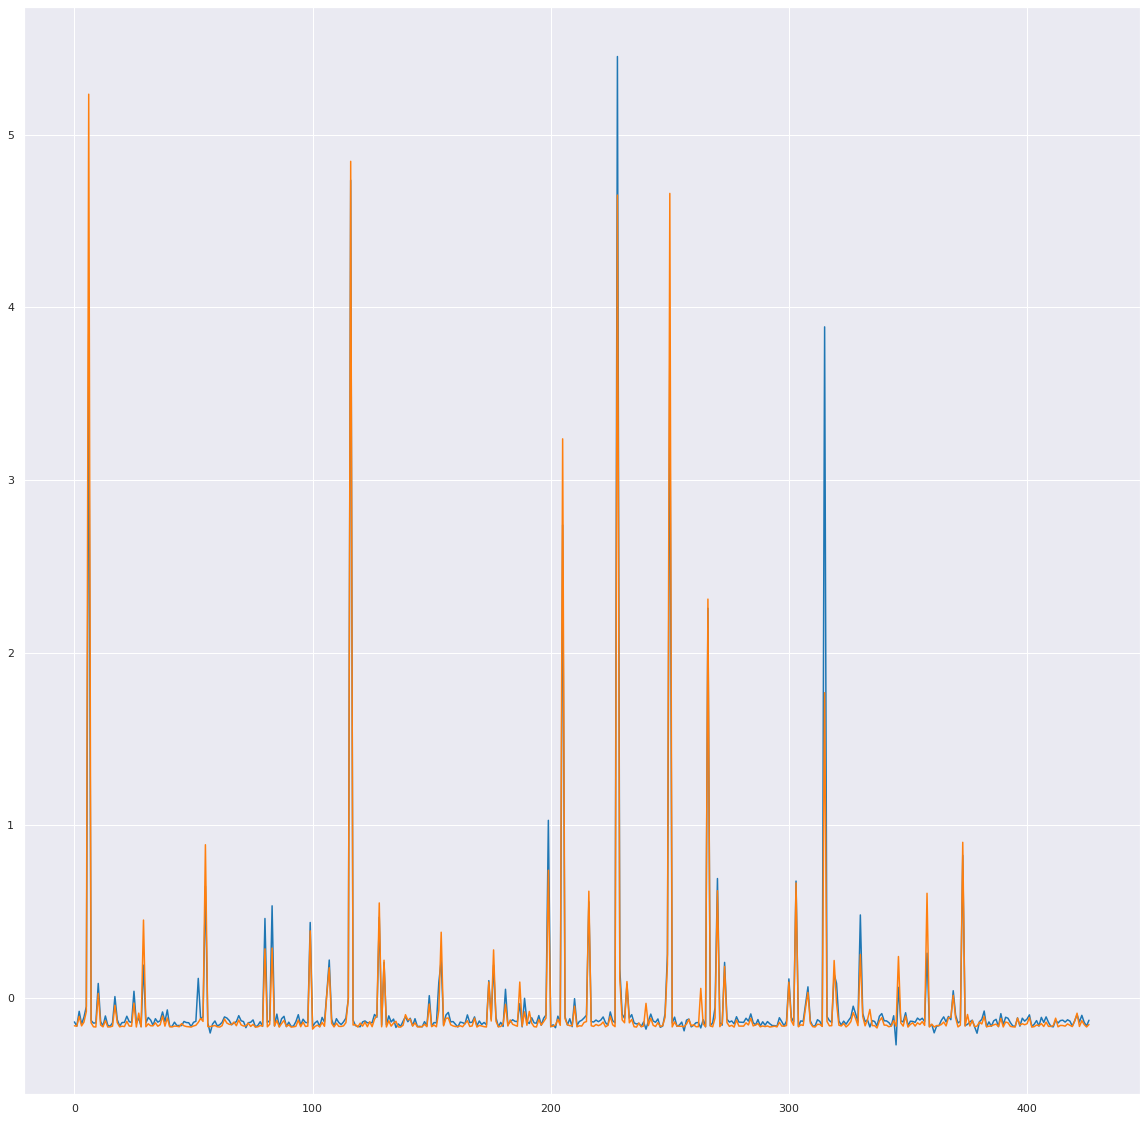

In [177]:
T = round(len(forecast)/3)
x = [i for i in range(T)]
sns.set_context("notebook")
sns.set_style("darkgrid")
plt.figure(figsize=(20,20))
sns.lineplot(x,forecast[0:T])
sns.lineplot(x,y_test_scale.values[0:T])

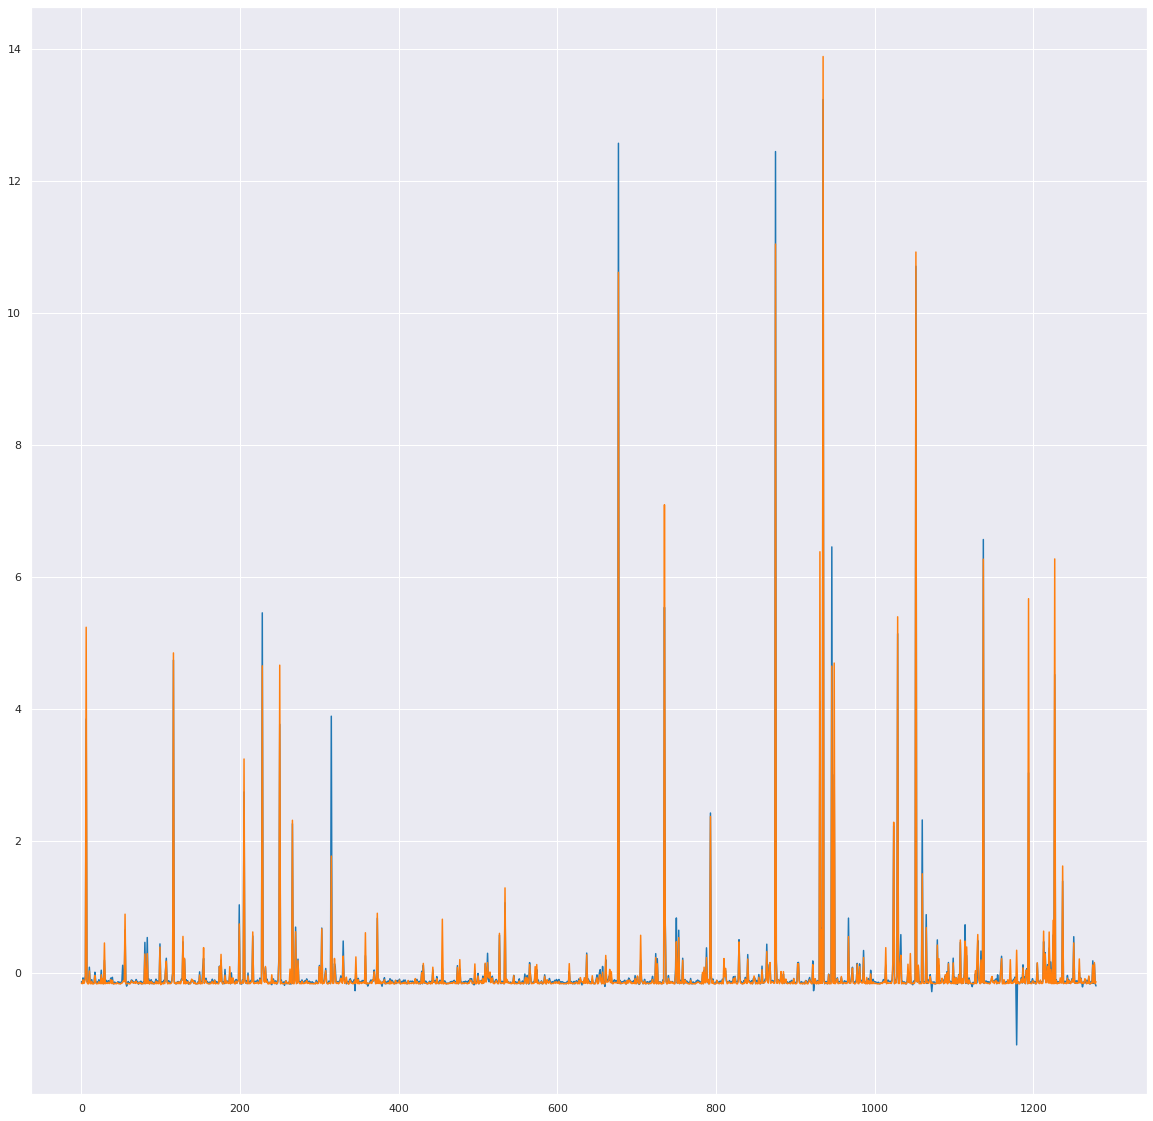

In [178]:
x = [i for i in range(len(forecast))]
sns.set_context("notebook")
sns.set_style("darkgrid")
plt.figure(figsize=(20,20))
sns.lineplot(x,forecast)
sns.lineplot(x,y_test_scale.values)

In [179]:
tf.keras.metrics.mean_absolute_error(forecast,y_test_scale.values).numpy()

0.04689430912523539

In [180]:
tf.keras.metrics.mean_absolute_percentage_error(forecast,y_test_scale.values).numpy()

39.4535290281371